In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AIR_DATA.csv')
del df['StationId']
del df['Datetime']
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [3]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df=df.dropna()
df.shape

(203693, 14)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['AQI_Bucket']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2543904,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,2
2543905,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,2
2543906,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,2
2543907,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,2
2543908,54.47,117.12,4.20,39.00,43.17,48.02,0.62,9.20,31.63,56.04,55.58,1.12,215.0,2


In [7]:
#without AQI
x1_without = df.drop(labels=['AQI_Bucket','AQI'], axis=1)
y1_without = df.loc[:,'AQI_Bucket']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_no,y_no=ros.fit_resample(x1_without,y1_without)
print("OUR DATASET COUNT         : ", Counter(y1_without))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_no))

OUR DATASET COUNT         :  Counter({1: 88654, 3: 69531, 0: 22852, 2: 11704, 5: 9147, 4: 1805})
OVER SAMPLING DATA COUNT  :  Counter({1: 88654, 2: 88654, 5: 88654, 3: 88654, 0: 88654, 4: 88654})


In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_no, y_no, test_size=0.20, random_state=42, stratify=y_no)
print("NUMBER OF TRAIN DATASET    : ", len(xtrain))
print("NUMBER OF TEST DATASET      : ", len(xtest))
print("TOTAL NUMBER OF DATASET    : ", len(xtrain)+len(xtest))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [10]:
from xgboost import XGBClassifier

In [11]:
# Without AQI
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [12]:
#without AQI
predict = xgb.predict(xtest)

In [13]:
#Without AQI
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytest,predict)
print('THE CONFUSION MATRIX SCORE OF XGB CLASSIFIER:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF XGB CLASSIFIER:


 [[16143    13     0  1573     1     0]
 [  259 12184  1838  3191     8   251]
 [   19  1433 13908   417    23  1931]
 [ 2681  2511   206 12315     3    15]
 [    0     0     0     0 17731     0]
 [    3   394  1668   104   479 15083]]


In [14]:
#without AQI
from sklearn.metrics import accuracy_score
accur = accuracy_score(ytest,predict)
print("THE ACCURACY SCORE OF XGB CLASSIFIER IS :",accur*100)

THE ACCURACY SCORE OF XGB CLASSIFIER IS : 82.12059970860554


In [15]:
#Without AQI
from sklearn.metrics import hamming_loss
Hl = hamming_loss(ytest,predict)
print("THE HAMMING LOSS OF XGB CLASSIFIER IS :",Hl*100)

THE HAMMING LOSS OF XGB CLASSIFIER IS : 17.87940029139446


In [16]:
from sklearn.metrics import classification_report
P = classification_report(ytest,predict)
print("THE CLASSIFICATION REPORT OF XGB CLASSIFIER IS :\n\n",P)

THE CLASSIFICATION REPORT OF XGB CLASSIFIER IS :

               precision    recall  f1-score   support

           0       0.84      0.91      0.88     17730
           1       0.74      0.69      0.71     17731
           2       0.79      0.78      0.79     17731
           3       0.70      0.69      0.70     17731
           4       0.97      1.00      0.99     17731
           5       0.87      0.85      0.86     17731

    accuracy                           0.82    106385
   macro avg       0.82      0.82      0.82    106385
weighted avg       0.82      0.82      0.82    106385





DISPLAY CONFUSION MATRIX : 




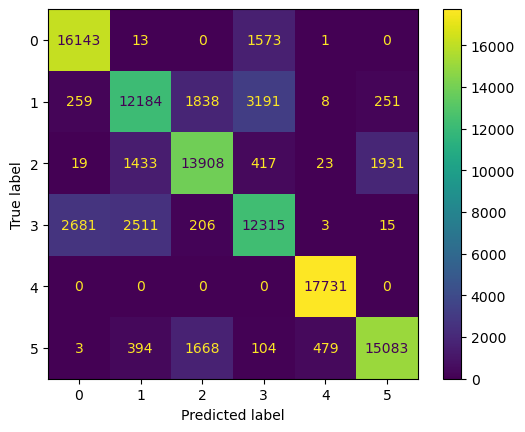

In [18]:

print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(ytest, predict, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()


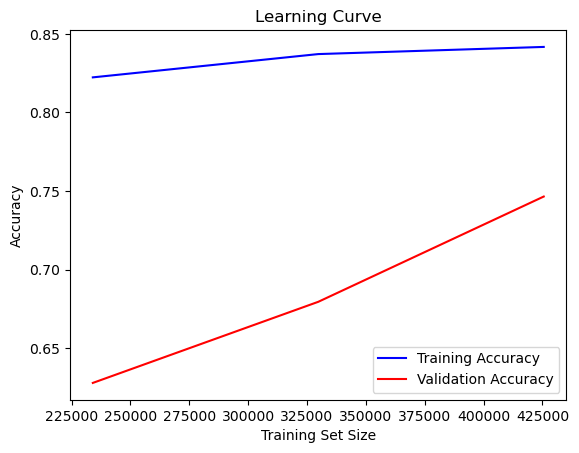

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(xgb,x_no,y_no, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method="gpu_hist")
print("Using GPU" if xgb.get_params()["tree_method"] == "gpu_hist" else "Not using GPU")


Using GPU


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                                   n_iter=30, cv=3, verbose=1, 
                                   n_jobs=-1, random_state=42)

random_search.fit(xtrain, ytrain)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


In [ ]:

# Use Best Model
best_xgb = grid_search.best_estimator_

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(xtrain, ytrain)
